In [119]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
%matplotlib inline

In [93]:
# Reading training Data
train_df = pd.read_csv('airbnb_listing_train.csv')

In [94]:
train_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,NaN,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,15-02-2020,0.27,1,0,220
1,13289321,East is where your home is!,10259430,Ana,NaN,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,19-06-2019,0.29,1,0,110
2,40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,NaN,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,16-03-2020,1.65,1,7,100
3,7820311,great appartment down town,693472,Ayden,NaN,Westerpark,52.37792,4.87300,Entire home/apt,3,42,17-02-2020,0.72,1,0,130
4,27346603,Private room with canal view in peaceful area,41888346,Alissa,NaN,Westerpark,52.38051,4.87493,Private room,2,89,26-02-2020,4.02,1,24,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12896,20757739,Quiet stylish private room 15 mins to city ce...,63932037,Michelle,NaN,De Baarsjes - Oud-West,52.37194,4.84965,Entire home/apt,1,1,13-09-2017,0.03,1,88,65
12897,1055570,"Beautiful, spacious apt. with great views @ IJ...",5813322,Rens,NaN,IJburg - Zeeburgereiland,52.36263,4.98031,Entire home/apt,7,238,25-02-2020,2.75,1,357,160
12898,13178435,Great apartment de Pijp/Albert Cuyp,46370427,Francien,NaN,De Pijp - Rivierenbuurt,52.35719,4.90009,Entire home/apt,3,15,07-10-2018,0.31,1,0,180
12899,21963760,Stylish apartment in an amazing location,4895882,Olaf,NaN,Zuid,52.34855,4.85105,Entire home/apt,2,11,28-04-2019,0.37,1,0,136


In [95]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12901 non-null  int64  
 1   name                            12879 non-null  object 
 2   host_id                         12901 non-null  int64  
 3   host_name                       12893 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   12901 non-null  object 
 6   latitude                        12901 non-null  float64
 7   longitude                       12901 non-null  float64
 8   room_type                       12901 non-null  object 
 9   minimum_nights                  12901 non-null  int64  
 10  number_of_reviews               12901 non-null  int64  
 11  last_review                     11305 non-null  object 
 12  reviews_per_month               

In [96]:
train_df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
count,1.290100e+04,12879,1.290100e+04,12893,0.0,12901,12901.000000,12901.000000,12901,12901.000000,12901.000000,11305,11305.000000,12901.000000,12901.000000,12901.000000
unique,NaN,12653,NaN,4536,NaN,22,NaN,NaN,4,NaN,NaN,1495,NaN,NaN,NaN,NaN
top,NaN,Amsterdam,NaN,Martijn,NaN,De Baarsjes - Oud-West,NaN,NaN,Entire home/apt,NaN,NaN,08-03-2020,NaN,NaN,NaN,NaN
freq,NaN,28,NaN,76,NaN,2209,NaN,NaN,10064,NaN,NaN,269,NaN,NaN,NaN,NaN
mean,1.984923e+07,NaN,6.321700e+07,NaN,NaN,NaN,52.365313,4.889744,NaN,3.542516,24.803194,NaN,0.748501,2.136501,61.392295,166.959538
std,1.216241e+07,NaN,8.010814e+07,NaN,NaN,NaN,0.016418,0.036016,NaN,15.154077,53.406134,NaN,1.260791,6.001838,107.988329,234.794630
min,2.016800e+04,NaN,3.592000e+03,NaN,NaN,NaN,52.289270,4.755720,NaN,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,6.000000
25%,9.869642e+06,NaN,8.948269e+06,NaN,NaN,NaN,52.355190,4.863950,NaN,2.000000,2.000000,NaN,0.180000,1.000000,0.000000,99.000000
50%,1.874939e+07,NaN,2.711601e+07,NaN,NaN,NaN,52.364570,4.887130,NaN,2.000000,9.000000,NaN,0.380000,1.000000,0.000000,135.000000
75%,2.914232e+07,NaN,8.337686e+07,NaN,NaN,NaN,52.375110,4.909310,NaN,3.000000,24.000000,NaN,0.770000,1.000000,87.000000,190.000000


In [97]:
top15hosts = train_df.host_name.value_counts().head(15)
top15hosts

Martijn           76
Anne              58
Thomas            53
Bas               51
Tim               51
Marieke           51
Michiel           51
Paul              51
Jasper            49
Jeroen            49
Joost             49
Suzanne           49
Eva               49
Wendy And Bram    49
Sophie            48
Name: host_name, dtype: int64

These are the top 15 hosts with their listings, Martijn being the top followed by Anne Thomas and others.

In [98]:
# neighbourhood_group column is empty so dropping it
train_df.drop(['neighbourhood_group'],axis=1,inplace=True)

In [99]:
train_df.isnull().sum()[train_df.isnull().sum() != 0]

name                   22
host_name               8
last_review          1596
reviews_per_month    1596
dtype: int64

In [100]:
# We have host_id so dropping host_name
train_df.drop(['host_name'],axis=1,inplace=True)

In [101]:
# last_review represents the last time someone gave review, we have number_of_reviews, and reviews_per_month so dropping last_review column

In [102]:
train_df.drop(['last_review'],axis=1,inplace=True)

In [109]:
# Filling missing name columns with highest frequenct name (mode)
train_df.name.fillna(train_df.name.mode()[0],inplace=True)

In [110]:
train_df.name.isnull().sum()

0

In [111]:
# Lets look into reviews_per_month column

In [115]:
train_df[(train_df['reviews_per_month'].isnull()) & (train_df['number_of_reviews']!=0)]

,id,name,host_id,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price


In [117]:
# As we can see all the columns that have missing values in reviews_per_month column have 0 reviews so the reviews_per_month column is missing
# imputing the missing values with 0
train_df.reviews_per_month.fillna(0,inplace=True)

In [118]:
train_df.isnull().sum()

id                                0
name                              0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price                             0
dtype: int64

In [199]:
#latitude and longitude columns can be dropped as neighbourhood is present and it represents them
train_df.drop(['latitude','longitude'],axis=1,inplace=True)

In [208]:
# Dropping id, name, host_id columns
train_df.drop(['id','name','host_id'],axis=1,inplace=True)

In [209]:
train_df

,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,De Pijp - Rivierenbuurt,Entire home/apt,3,13,0.27,1,0,220
1,Oud-Oost,Entire home/apt,4,14,0.29,1,0,110
2,Centrum-West,Entire home/apt,2,9,1.65,1,7,100
3,Westerpark,Entire home/apt,3,42,0.72,1,0,130
4,Westerpark,Private room,2,89,4.02,1,24,90
...,...,...,...,...,...,...,...,...
12896,De Baarsjes - Oud-West,Entire home/apt,1,1,0.03,1,88,65
12897,IJburg - Zeeburgereiland,Entire home/apt,7,238,2.75,1,357,160
12898,De Pijp - Rivierenbuurt,Entire home/apt,3,15,0.31,1,0,180
12899,Zuid,Entire home/apt,2,11,0.37,1,0,136


In [211]:
train_df.room_type.value_counts()

Entire home/apt    10064
Private room        2622
Hotel room           174
Shared room           41
Name: room_type, dtype: int64

c:\users\ukarj\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='room_type', ylabel='count'>

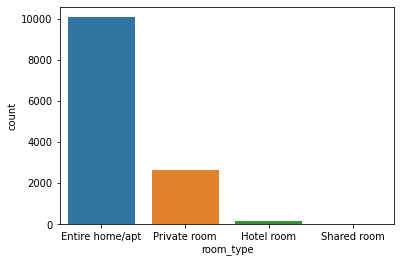

In [215]:
sns.countplot(train_df.room_type,order=train_df.room_type.value_counts().index)

In [216]:
train_df.neighbourhood.value_counts()

De Baarsjes - Oud-West                    2209
De Pijp - Rivierenbuurt                   1600
Centrum-West                              1429
Centrum-Oost                              1097
Westerpark                                 958
Zuid                                       924
Oud-Oost                                   831
Bos en Lommer                              730
Oostelijk Havengebied - Indische Buurt     644
Watergraafsmeer                            381
Oud-Noord                                  376
IJburg - Zeeburgereiland                   321
Slotervaart                                269
Noord-West                                 257
Noord-Oost                                 171
Buitenveldert - Zuidas                     155
Geuzenveld - Slotermeer                    144
De Aker - Nieuw Sloten                      88
Osdorp                                      83
Gaasperdam - Driemond                       80
Bijlmer-Centrum                             78
Bijlmer-Oost 

c:\users\ukarj\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood', ylabel='count'>

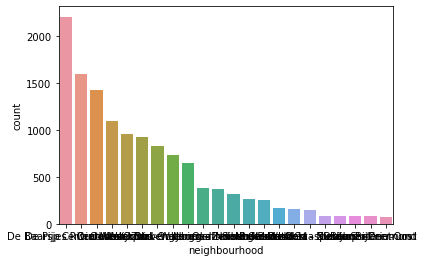

In [217]:
sns.countplot(train_df.neighbourhood,order=train_df.neighbourhood.value_counts().index)